# User behaviour research for the international online store


Given research is investigating user behaviour for an international online store.

We start with the sales funnel to find out how users reach the purchase stage, how many users actually make it to this stage and how many get stuck at previous stages.

Then we'll look at the results of an A/B test regarding changes related to the introduction of an improved recommendation system: Expected result: within 14 days of signing up, users will show better conversion into product page views (the product_page event), product card views (product_card) and purchases (purchase). At each of the stage of the funnel product_page → product_card → purchase, there will be at least a 10% increase.

The users are split into 2 groups: А (control group - get the old payment funnel), B (test group - gets the new payment funnel).

## Table Of Content:
1. [Openning data & pre-processing](#start)
    - 1.1. [Openning the data](#data)
    - 1.2. [Conclusion](#start-conc)
2. [Data analysis](#analysis)
    - 2.1 [Conclusion](#analysis-conc)
3. [Carrying out exploratory data analysis](#checking)
    - 3.1 [Conclusion](#checking-conc)
4. [Evaluating the A/B test results](#a/b)
    - 4.1 [Conclusion](#funnel-conc)
5. [Evaluating the A/B test results](#results)
    - 5.1 [Conclusion](#results-conc)
6. [General conclusion](#conclusion)

## Step 1. Openning data & pre-processing <a class="anchor" id="start"></a>


In [1]:
!pip install -q fastcluster

In [2]:
!pip install -q seaborn==0.11.0

In [1]:
import statsmodels.api as sm

In [2]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import math as mt
from math import factorial
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import plotly.express as px
import seaborn as sns
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
import warnings
from datetime import date, timedelta
from datetime import datetime



In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.1 Openning the data<a class="anchor" id="data"></a>



In [6]:
#Let’s read the data from the csv and check what we have there.
#table from the csv file will be saved as df1:

df1 = pd.read_csv('/datasets/ab_project_marketing_events_us.csv', sep=',')
df1.info()
display(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [7]:
#Let’s read the data from the csv and check what we have there.
#table from the csv file will be saved as df2:

df2 = pd.read_csv('/datasets/final_ab_new_users_us.csv', sep=',')
df2.info()
display(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [8]:
#Let’s read the data from the csv and check what we have there.
#table from the csv file will be saved as df3:

df3 = pd.read_csv('/datasets/final_ab_events_us.csv', sep=',')
df3.info()
display(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [9]:
#Let’s read the data from the csv and check what we have there.
#table from the csv file will be saved as df1:

df4 = pd.read_csv('/datasets/final_ab_participants_us.csv', sep=',')
df4.info()
display(df4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


### 1.2 Conclusion <a class="anchor" id="start-conc"></a>

In the present research we are working with a 4 data sets of the user behaviour for the international online store. 

Datasets were saved in the following tables: 

**df1** for the csv file ab_project_marketing_events_us. Its total length is 14 rows, every row represents one marketing event and its characteristics in columns: name — the name of the marketing event; regions — regions where the ad campaign will be held; start_dt — campaign start date; finish_dt — campaign end date.

**df2** for the csv file final_ab_new_users_us. Its total length is 61733 rows, every row represents registration details for one user and its characteristics in columns: user_id - user's unique identifier; first_date — sign-up date; region - where the user is registered; device — device used to sign up.

**df3** for the csv file final_ab_events_us. Its total length is 440317 rows, every row represents one log entry and its characteristics in columns: user_id - user's unique identifier; event_dt — event date and time; event_name — event type name; details — additional data on the event (for instance, the order total in USD for `purchase` events).


**df4** for the csv file final_ab_participants_us. Its total length is 18268 rows, every row represents one A/B test participant characteristics in the following columns: user_id - user's unique identifier; ab_test — test name; group — the test group the user belonged to.


## Step 2. Data analysis <a class="anchor" id="analysis"></a>

Let's prepare the data for analysis: rename the columns, check for missing values and data types, correct the data if needed, add a date and time column and a separate column for dates.

Checking missing values

In [10]:
#checking missing values
df1[df1.isnull().any(axis=1)] 

,name,regions,start_dt,finish_dt


In [11]:
df2[df2.isnull().any(axis=1)] 


,user_id,first_date,region,device


In [12]:
df4[df4.isnull().any(axis=1)] 


,user_id,group,ab_test


In [13]:
df3[df3.isnull().any(axis=1)] 
#mssing values --> details column
#that is additional data on the event (for instance, the order total in USD for purchase events)
print(
    'missing values in details column (final_ab_events_us table): {:.0%}' 
    .format(df3.details.isnull().sum()/len(df3))
)

missing values in details column (final_ab_events_us table): 86%


Changeing data types

In [14]:
#let's make sure all date columns are saved as date data type instead of string

df1['start_dt'] = df1['start_dt'].astype('datetime64[D]')
df1['finish_dt'] = df1['finish_dt'].astype('datetime64[D]')

df2['first_date'] = pd.to_datetime(df2['first_date']).dt.normalize()

df3['event_dt'] = pd.to_datetime(df3['event_dt']).dt.normalize()


Checking for duplicates

In [15]:
df1[df1.duplicated()]
#no duplicates

,name,regions,start_dt,finish_dt


In [16]:
df2[df2.duplicated()]
#no duplicates

,user_id,first_date,region,device


In [17]:
df4[df4.duplicated()]
#no duplicates

,user_id,group,ab_test


In [18]:
df3[df3.duplicated()]
# there is a duplicated entry that we'll drop

,user_id,event_dt,event_name,details
41759,72C55C38CAE0B00B,2020-12-21,purchase,4.99
377026,72C55C38CAE0B00B,2020-12-21,login,NaN


In [19]:
#let's drop duplicates
df3 = df3.drop_duplicates().reset_index(drop=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440315 entries, 0 to 440314
Data columns (total 4 columns):
user_id       440315 non-null object
event_dt      440315 non-null datetime64[ns]
event_name    440315 non-null object
details       62739 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


### 2.1 Conclusion <a class="anchor" id="analysis-conc"></a>

In the present step we prepared the data for analysis: checked missing values - 86% of details column regarding prices data is missing (we'll see if we can skip using it). Regarding data types, we corrects the date and time in df1, df2 and df3 tables. There was a duplicated entry in the df3 table that we droped.

## Step 3. Carrying out exploratory data analysis
 <a class="anchor" id="chincking"></a>

In this step we'll study conversion at different funnel stages; checking wheather the number of events per user distributed equally in the sample or not; checking if we have users who enter both samples; checking the number of events distributed by days; outlining details in the data that will be taken into account before starting the A/B test.

First, let's prepare the data.

In [20]:
#let's check what tests do we have
df4.groupby(['group','ab_test']).size()

group  ab_test                
A      interface_eu_test          5831
       recommender_system_test    3824
B      interface_eu_test          5736
       recommender_system_test    2877
dtype: int64

As our research is done for the interface_eu_test, let's drop participants from other test (recommender_system_test), that is not relevant here. As we would not know what screen saw the user in the event table, we will drop/exclude all the users, who were in the recommender_system_test as well.

In [21]:
old_test=df4[df4.ab_test=="recommender_system_test"]['user_id'].unique()
len(old_test)

6701

In [22]:
old_test

array(['D1ABA3E2887B6A73', 'A7A3664BD6242119', 'DABC14FDDFADD29E', ...,
       'F2FBBA33F37DEC46', '29C92313A98B1176', '6715343AFBA285AE'],
      dtype=object)

In [23]:
df4.drop(df4[df4['ab_test']=='recommender_system_test'].index, axis=0, inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11567 entries, 6701 to 18267
Data columns (total 3 columns):
user_id    11567 non-null object
group      11567 non-null object
ab_test    11567 non-null object
dtypes: object(3)
memory usage: 361.5+ KB


In [24]:
df4.groupby(['group','ab_test']).size()

group  ab_test          
A      interface_eu_test    5831
B      interface_eu_test    5736
dtype: int64

In [25]:
#let's merge our users' tables into one: df2, df3 and df4 into df
df = df2.merge(df4, on='user_id', how='left')
df = df.merge(df3, on='user_id', how='left')
#df
#df.groupby(['group','ab_test']).nunique()

In [26]:
#let's drop all users that are not in our groups = A or B
df=df.dropna(subset=['group'])

In [27]:
#let's drop users who participated in the old test
df = df[~df.user_id.isin(old_test)]
#df

In [28]:
#let's check number of users in every group 
testA=df[df.group=="A"]['user_id'].unique()
print('Amount of 1st group users: {}'.format(len(testA)))


Amount of 1st group users: 5012


In [29]:
#let's check number of users in every group 
testB=df[df.group=="B"]['user_id'].unique()
print('Amount of 1st group users: {}'.format(len(testB)))


Amount of 1st group users: 4953


In [30]:
#let's check if there are users in both groups A and B
a=df.query('user_id in @testA')
ab=a.query('user_id in @testB')
ab
#there are no users in both groups

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details


Our further analysis will be based on each group A and B.


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76035 entries, 8 to 443342
Data columns (total 9 columns):
user_id       76035 non-null object
first_date    76035 non-null datetime64[ns]
region        76035 non-null object
device        76035 non-null object
group         76035 non-null object
ab_test       76035 non-null object
event_dt      76033 non-null datetime64[ns]
event_name    76033 non-null object
details       11237 non-null float64
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 5.8+ MB


In [32]:
#how many users we have
df.user_id.nunique()

9965

In [33]:
#how many events in each group
df.group.value_counts()

A    38533
B    37502
Name: group, dtype: int64

In [34]:
#period of time does the data cover (max and min event date)
print('Min date:',df.event_dt.min())
print('Max date:',df.event_dt.max())

Min date: 2020-12-07 00:00:00
Max date: 2020-12-30 00:00:00


In [35]:
#period of time of registration (max and min date)
print('Min date:',df.first_date.min())
print('Max date:',df.first_date.max())

Min date: 2020-12-07 00:00:00
Max date: 2020-12-23 00:00:00


In [36]:
#average number of events per user
avg_events_user=int(round(df.groupby('user_id').agg({'event_dt':'nunique'}).mean()))
print('Average number of events per user: {}'.format(avg_events_user))

Average number of events per user: 3


In [37]:
#number of events per user
x=df.groupby(['user_id','group']).agg({'event_dt':'nunique'}).reset_index()
#x.groupby(['group','event_dt']).size()

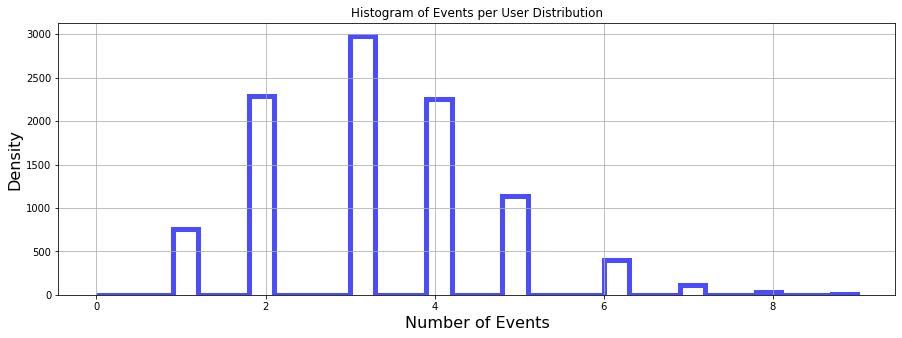

In [38]:
#histogram events per user distribution
plt.xlabel("Number of Events", fontsize=16)  
plt.ylabel("Density", fontsize=16)
plt.title("Histogram of Events per User Distribution")
x.event_dt.hist(
    bins = 30, histtype='step', 
    alpha=0.7, grid=True, figsize = (15,5),
    linewidth=5, color='blue')
plt.show()

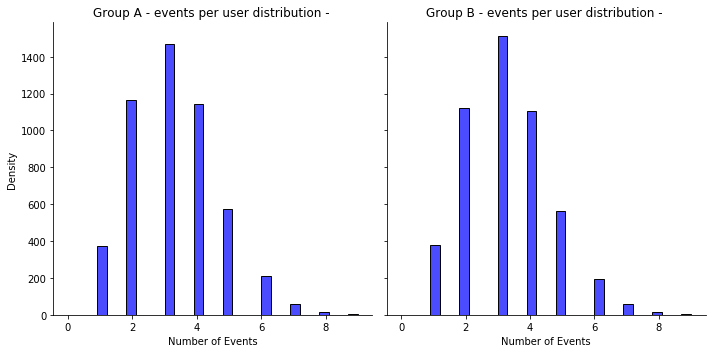

In [39]:
#events per user distribution: group A vs B

g=sns.displot(data=x, x="event_dt", col="group", multiple="dodge",
            bins = 30, alpha=0.7,
            color='blue')

g.set_axis_labels(y_var='Density', x_var='Number of Events')
axes = g.axes.flatten()
axes[0].set_title("Group A - events per user distribution - ")
axes[1].set_title("Group B - events per user distribution - ")
plt.show()


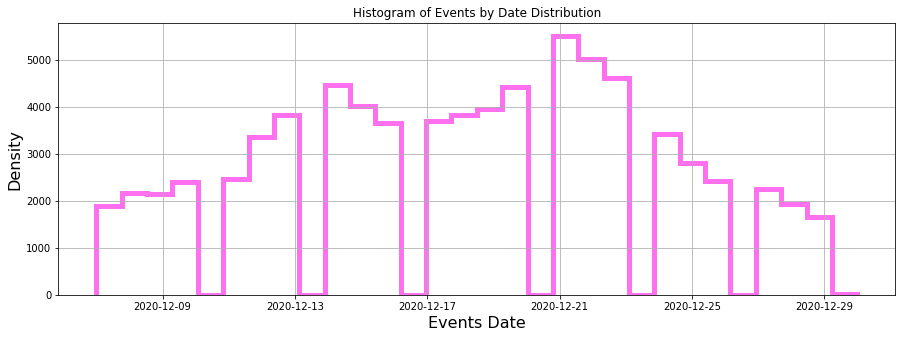

In [40]:
#histogram by date and time
plt.xlabel("Events Date", fontsize=16)  
plt.ylabel("Density", fontsize=16)
plt.title("Histogram of Events by Date Distribution")
df.event_dt.hist(
    bins = 30, histtype='step', 
    alpha=0.7, grid=True, figsize = (15,5),
    linewidth=5, color='#ff33e9')
plt.show()

Thus, in our table we have :

- 76,035 events
- 9,965 users
- 3 is the average number of events per user
- Period of time does the data covers
    - from 2020-12-07 to 2020-12-30
    
There are 5012 unique users in a group A and 4953 in group B.

In group A - 38,533 events, in group B - 37,502.

Let's study conversion at different funnel stages now.

Events and their frequency

In [41]:
#event types per group
df.groupby(['group','event_name']).size()

group  event_name  
A      login           16354
       product_cart     5402
       product_page    10932
       purchase         5844
B      login           16102
       product_cart     5475
       product_page    10531
       purchase         5393
dtype: int64

While checking event types (stages) and their frequency of occurrence, we found that 
- for group A login appeared 16354 times, then product_page - 10932 times, purchase - 5844 and product_cart - 5402 times;

- for group B login appeared 16102 times, then product_page - 10531 times, product_cart - 5475 times and purchase - 5393.

Sequence of event types:

Based on the above findings, we confirm the assumption of the test that the sequence is as follows:

A login --> B product_page --> C product_cart --> D purchase

We would suppose that product_cart is an optional part for the group B (testing new payment funnel) and the user can go directly to the purchase stage.


Let's check conversion at different funnel stages (share of users that proceed from each stage to the next). 

In [42]:
funnel=df.groupby(
    ['user_id','group','event_name']).agg({'event_dt':'count'}).reset_index()
funnel_pv=funnel.pivot_table(
    index=['user_id','group'], columns='event_name', 
    values='event_dt', aggfunc='count').reset_index()
funnel_pv.head()
#all_funnel_pv=funnel_pv.dropna()
#all_funnel_pv

event_name,user_id,group,login,product_cart,product_page,purchase
0,0002CE61FF2C4011,A,1.0,1.0,1.0,NaN
1,001E72F50D1C48FA,B,1.0,NaN,1.0,NaN
2,002412F1EB3F6E38,A,1.0,NaN,1.0,NaN
3,002540BE89C930FB,A,1.0,1.0,1.0,NaN
4,0031F1B5E9FBF708,B,1.0,NaN,NaN,1.0


Let's check users who went through the login (A), product_page (B), product_cart (C) and the purchase (D) screens

In [43]:
#users who went through the login (A) to product_page (B)

a_stage_Agroup=funnel_pv.query('login >=1 and group=="A"')['user_id']
print('a_stage: group A',a_stage_Agroup.nunique())
a_stage_Bgroup=funnel_pv.query('login >=1 and group=="B"')['user_id']
print('a_stage: group B',a_stage_Bgroup.nunique())
print()

a_b_stage_Agroup=funnel_pv.query('login >=1 & product_page >=1 and group=="A"')['user_id']
print('a_b_stage group A',a_b_stage_Agroup.nunique())
print('ratio b to a stage group A',round(a_b_stage_Agroup.nunique()/a_stage_Agroup.nunique(),2))
a_b_stage_Bgroup=funnel_pv.query('login >=1 & product_page >=1 and group=="B"')['user_id']
print('a_b_stage group B',a_b_stage_Bgroup.nunique())
print('ratio b to a stage group B',round(a_b_stage_Bgroup.nunique()/a_stage_Bgroup.nunique(),2))
print()

a_stage: group A 5010
a_stage: group B 4952

a_b_stage group A 3366
ratio b to a stage group A 0.67
a_b_stage group B 3254
ratio b to a stage group B 0.66



In [44]:
#users who went through the login (A) to product_page (B),
#product_cart (C)
a_b_c_stage_Agroup=funnel_pv.query('login >=1 & product_page >=1 & product_cart >=1 and group=="A"')['user_id']
print('a_b_c_stage group A',a_b_c_stage_Agroup.nunique())
print('ratio c to b stage group A',round(a_b_c_stage_Agroup.nunique()/a_b_stage_Agroup.nunique(),2))
a_b_c_stage_Bgroup=funnel_pv.query('login >=1 & product_page >=1 & product_cart >=1 and group=="B"')['user_id']
print('a_b_c_stage group B',a_b_c_stage_Bgroup.nunique())
print('ratio c to b stage group B',round(a_b_c_stage_Bgroup.nunique()/a_b_stage_Bgroup.nunique(),2))
print()



a_b_c_stage group A 1079
ratio c to b stage group A 0.32
a_b_c_stage group B 1108
ratio c to b stage group B 0.34



In [45]:
#users who went through the login (A) to product_page (B),
#tproduct_cart (C) and the purchase (D) screens

a_b_c_d_stage_Agroup=funnel_pv.query('login >=1 & product_page >=1 & product_cart >=1 & purchase>=1 and group=="A"')['user_id']
print('a_b_c_d_stage group A',a_b_c_d_stage_Agroup.nunique())
print('ratio d to c stage group A',round(a_b_c_d_stage_Agroup.nunique()/a_b_c_stage_Agroup.nunique(),2))
a_b_c_d_stage_Bgroup=funnel_pv.query('login >=1 & product_page >=1 & product_cart >=1 & purchase>=1 and group=="B"')['user_id']
print('a_b_c_d_stage group B',a_b_c_d_stage_Bgroup.nunique())
print('ratio d to c stage group B',round(a_b_c_d_stage_Bgroup.nunique()/a_b_c_stage_Bgroup.nunique(),2))


a_b_c_d_stage group A 380
ratio d to c stage group A 0.35
a_b_c_d_stage group B 368
ratio d to c stage group B 0.33


In [46]:
#users who went through the product_page (B stage) screen and the purchase (D stage) in group A vs group B

b_stage_Agroup=funnel_pv.query('product_page >=1 and group=="A"')['user_id']
print('b stage A group:',b_stage_Agroup.nunique())
b_stage_Bgroup=funnel_pv.query('product_page >=1 and group=="B"')['user_id']
print('b stage B group:',b_stage_Bgroup.nunique())
print()

b_d_stage_Agroup=funnel_pv.query('product_page >=1 & purchase >=1 and group=="A"')['user_id']
print('b_d_stage A group:',b_d_stage_Agroup.nunique())
print('ratio d to b stage B group:',round(b_d_stage_Agroup.nunique()/b_stage_Agroup.nunique(),2))
b_d_stage_Bgroup=funnel_pv.query('product_page >=1 & purchase >=1 and group=="B"')['user_id']
print('b_d_stage B group:',b_d_stage_Bgroup.nunique())
print('ratio d to b stage B group:',round(b_d_stage_Bgroup.nunique()/b_stage_Bgroup.nunique(),2))

b stage A group: 3366
b stage B group: 3254

b_d_stage A group: 1221
ratio d to b stage B group: 0.36
b_d_stage B group: 1126
ratio d to b stage B group: 0.35


We can see that difference between groups is not that signifficant in conversion from one stage to the next.

### 3.1 Conclusion <a class="anchor" id="checking-conc"></a>

In the present step of exploratory data analysis we merged our user related tables, cleaned our data and remained only with users who are part of the interface_eu_test test (to make sure we know what screens were shown to the users we removed all those users who participated in both tests: interface_eu_test and recommender_system_test).

Thus, in our table we found :

- 76,035 events
- 9,965 users
- 3 is the average number of events per user
- Period of time does the data covers
    - from 2020-12-07 to 2020-12-30

There are 5012 unique users in a group A and 4953 in group B.
In group A - 38,533 events, in group B - 37,502.

We made sure that the number of events per user distributed almost equally in groups A and B, that there is no users who enter both samples, that most events distributed between 13 and 25 of December and less events are distributed in the beginning and in the end of the testing period.

While checking conversion at different funnel stages, we saw that the difference between group A and B in general is about 1-2%.

## Step 4. Evaluating the A/B test results
 <a class="anchor" id="a/b"></a>

Let's start this step with A/A test, splitting our A group into two samples.

In [47]:
#checking lenth of the sample A to devide it into two equal groups
print(len(testA))

#select randomly 2506 users to group Aa
group_Aa = random.sample(list(testA), k=2506)

#select other half to group Ab
group_Ab = np.setdiff1d(testA,group_Aa)

#number of users in each group
print('group Aa:', len(group_Aa))
print('group Ab:', len(group_Ab))

#check that users in group A are not in B and the opposite
Aa=df.query('user_id in @group_Aa')
Ab=Aa.query('user_id in @group_Ab')
Ab
#there are no users in both groups

5012
group Aa: 2506
group Ab: 2506


,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details


In [48]:
#let's assign these group to the events table df
df['group_A/A/B'] = df['user_id'].apply(lambda x: 'Ab' if x in group_Ab else ('Aa' if x in group_Aa else 'B'))


In [49]:
#let's check how many events we have per user
df['group_A/A/B'].value_counts()

B     37502
Aa    19299
Ab    19234
Name: group_A/A/B, dtype: int64

In [50]:
#number of events per user in A/A test
aa=df.groupby(['user_id','group_A/A/B']).agg({'event_dt':'nunique'}).reset_index()
aa.groupby(['group_A/A/B','event_dt']).size()

group_A/A/B  event_dt
Aa           1            182
             2            599
             3            730
             4            570
             5            276
             6            105
             7             32
             8             10
             9              2
Ab           0              1
             1            191
             2            568
             3            739
             4            571
             5            300
             6            103
             7             26
             8              6
             9              1
B            0              1
             1            380
             2           1121
             3           1511
             4           1108
             5            562
             6            194
             7             59
             8             14
             9              3
dtype: int64

We can see that partition of events in our AA test groups is pretty much homogenous. 

In [51]:
#now let's check the share of each funnel stage in our groups: Aa and Ab vs B
pivot_share = df.pivot_table(
    index='event_name', values='user_id', columns='group_A/A/B', aggfunc=lambda x: x.nunique(),margins=True).reset_index()

pivot_share.columns=(['event_name','group_Aa','group_Ab','group_B', 'Total'])
pivot_share.reset_index()
pivot_share['group_Aa%']=round(100*pivot_share['group_Aa']/pivot_share['Total'])
pivot_share['group_Ab%']=round(100*pivot_share['group_Ab']/pivot_share['Total'])
pivot_share['group_B%']=round(100*pivot_share['group_B']/pivot_share['Total'])
pivot_share

,event_name,group_Aa,group_Ab,group_B,Total,group_Aa%,group_Ab%,group_B%
0,login,2506,2504,4952,9962,25.0,25.0,50.0
1,product_cart,817,812,1686,3315,25.0,24.0,51.0
2,product_page,1670,1696,3254,6620,25.0,26.0,49.0
3,purchase,912,870,1653,3435,27.0,25.0,48.0
4,All,2506,2505,4952,9963,25.0,25.0,50.0


We can see that the difference in share between groups is slightly different but remains within 5% (mainly 1-2%), that is not significant. Let's check further the statistical signifficance then.

Let's create a function and test following NULL Hypothesis H0 and H1 with alpha as 5%:

- H0: The number of success in the given event type (stage) of the group B equals to the group A
- H1: The number of success in the given event type (stage) of the group B IS NOT equal to the group A

In [52]:
pivot = df.pivot_table(index='event_name', values='user_id', 
                       columns='group', aggfunc=lambda x: x.nunique()).reset_index()
pivot

group,event_name,A,B
0,login,5010,4952
1,product_cart,1629,1686
2,product_page,3366,3254
3,purchase,1782,1653


In order to get a pivot like the one above and we need to compare the 'conversion' of two test groups for different events. So we need to check whether two test groups are significantly different in each event, we need to use the test of proportions or z-score. Let's define that the success for each group will be the value of action from pivot table. For example, a success of product_cart for group A is 1629.


In [53]:
#let's access this value of success directly from our pivot table
pivot[pivot.event_name=='product_cart']['A'].iloc[0]

1629

Thus, knowing the event name and the name of the group, we can access any value of success from our pivot table for any event. Note: the value of trials will always be the same - the number of users in the groups.

In [54]:
def check_hypothesis(group1,group2, event, alpha=0.05):
    #let's start with successes, using indexing on our pivot table
    successes1=pivot[pivot.event_name==event][group1].iloc[0]
    successes2=pivot[pivot.event_name==event][group2].iloc[0]
    print( "Success for group", group1, "is",successes1, "for event", event,"\n",
          "Success for group", group2, "is",successes2, "for event", event,"\n")

In [55]:
check_hypothesis("A","B", 'product_cart', alpha=0.05)

Success for group A is 1629 for event product_cart 
 Success for group B is 1686 for event product_cart 



In [56]:
#now let's add trials (the total users in groups)

def check_hypothesis(group1,group2, event, alpha=0.05):
    #let's start with successes, using 
    successes1=pivot[pivot.event_name==event][group1].iloc[0]
    successes2=pivot[pivot.event_name==event][group2].iloc[0]
    
    #for trials we can go back to original df or used a pre-aggregated data
    trials1=df[df.group==group1]['user_id'].nunique()
    trials2=df[df.group==group2]['user_id'].nunique()
    
    print("Success for group", group1, "is",successes1, "for event", event,"\n",
          "Success for group", group2, "is",successes2, "for event", event,"\n",
          "Trials for group", group1, "is",trials1,"\n",
          "Trials for group", group2, "is",trials2,"\n")

In [57]:
check_hypothesis("A","B", 'product_cart', alpha=0.05)

Success for group A is 1629 for event product_cart 
 Success for group B is 1686 for event product_cart 
 Trials for group A is 5012 
 Trials for group B is 4953 



In [58]:
#now let's add the rest of the function

def check_hypothesis(group1,group2, event, alpha=0.05):
    #let's start with successes, using 
    successes1=pivot[pivot.event_name==event][group1].iloc[0]
    successes2=pivot[pivot.event_name==event][group2].iloc[0]
    
    #for trials we can go back to original df or used a pre-aggregated data
    trials1=df[df.group==group1]['user_id'].nunique()
    trials2=df[df.group==group2]['user_id'].nunique()
    
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2

    # proportion in a combined dataset
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / mt.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject H0 for",event, 'and for groups',group1,group2)
    else:
        print("Fail to Reject H0 for", event,'and for groups',group1,group2)  

In [59]:
check_hypothesis("A","B", 'product_cart', alpha=0.05)

p-value:  0.10326893846203533
Fail to Reject H0 for product_cart and for groups A B


In [60]:
#let's use this function to see if there is a statistically significant 
#difference between samples in group A and B
for i in pivot.event_name.unique():
    check_hypothesis("A","B", i, alpha=0.05)

p-value:  0.5705846932158525
Fail to Reject H0 for login and for groups A B
p-value:  0.10326893846203533
Fail to Reject H0 for product_cart and for groups A B
p-value:  0.12247464713382916
Fail to Reject H0 for product_page and for groups A B
p-value:  0.021999992681769553
Reject H0 for purchase and for groups A B


As per our findings above, our two groups in the A/B test (samples A and B) has no statistically significant difference between them in all stages except 1 - purchase stage.

Now let's take a look on our A/A test group.

In [61]:
combo_pv = df.pivot_table(index='event_name', values='user_id', 
                       columns='group_A/A/B', aggfunc=lambda x: x.nunique()).reset_index()
combo_pv

group_A/A/B,event_name,Aa,Ab,B
0,login,2506,2504,4952
1,product_cart,817,812,1686
2,product_page,1670,1696,3254
3,purchase,912,870,1653


In [62]:
#now let's update our finction with the new combo data 

def combo_hypothesis(group1,group2, event, alpha=0.05):
    #let's start with successes, using 
    successes1=combo_pv[combo_pv.event_name==event][group1].iloc[0]
    successes2=combo_pv[combo_pv.event_name==event][group2].iloc[0]
    
    #for trials we can go back to original df or used a pre-aggregated data
    trials1=df[df['group_A/A/B']==group1]['user_id'].nunique()
    trials2=df[df['group_A/A/B']==group2]['user_id'].nunique()
    
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2

    # proportion in a combined dataset
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / mt.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject H0 for",event, 'and for groups',group1,group2)
    else:
        print("Fail to Reject H0 for", event,'and for groups',group1,group2)  

In [63]:
combo_hypothesis("Aa","Ab", 'product_cart', alpha=0.05)

p-value:  0.8801437158383867
Fail to Reject H0 for product_cart and for groups Aa Ab


In [64]:
#let's use this function to see if there is a statistically significant 
#difference between samples in group Aa and Ab
for i in combo_pv.event_name.unique():
    combo_hypothesis("Aa","Ab", i, alpha=0.05)

p-value:  0.15721637606344663
Fail to Reject H0 for login and for groups Aa Ab
p-value:  0.8801437158383867
Fail to Reject H0 for product_cart and for groups Aa Ab
p-value:  0.4342144097649159
Fail to Reject H0 for product_page and for groups Aa Ab
p-value:  0.2152098465948422
Fail to Reject H0 for purchase and for groups Aa Ab


So we can see that our control group there is no statistically significant difference in groups Aa and Ab.

### 5.6 Conclusion<a class="anchor" id="results-conc"></a>

At this stage we split our control group A into two samples Aa and Ab. We found that they are split homogeneously, including events and funnel stages. Testing further statistical significance, we also found that there is no statistically significant difference in groups Aa and Ab.

Regarding our A/B test, we saw that events are split almost 50/50 between groups A and B and that there is no no statistically significant difference in groups A and B at all stages except 'purchase' stage.

## Step 6. General conclusion <a class="anchor" id="conclusion"></a>

Given research is investigating user behaviour for an international online store.

We looked at the results of an A/B test regarding changes related to the introduction of an improved recommendation system: expected result was to see better conversion into product page views (the product_page event), product card views (product_card) and purchases (purchase). 

At each of the stage of the funnel product_page → product_card → purchase, there had to be at least a 10% increase.  Users were split into 2 groups: А (control group - got the old payment funnel), B (test group - got the new payment funnel).

Thus, in our table we had 76,035 events; 9,965 users; 3 was the average number of events per user; during the period of time from 2020-12-07 to 2020-12-30. We tested 5012 unique users in a group A and 4953 in group B. In group A - 38,533 events, in group B - 37,502.

While checking event types (stages) and their frequency of occurrence, we found that
* for group A login appeared 16354 times, then product_page - 10932 times, purchase - 5844 and product_cart - 5402 times; 
* for group B login appeared 16102 times, then product_page - 10531 times, product_cart - 5475 times and purchase - 5393.

We made sure that the number of events per user were distributed almost equally in groups A and B, that there was no users who entered both samples, that most events distributed between 13 and 25 of December and less events were distributed in the beginning and in the end of the testing period.

While checking conversion at different funnel stages, we saw that the difference between group A and B in general was about 1-2%.
As a result, while studied the sales funnel, we found out that 35% of users actually reach the purchase stage, and others are stuck at previous stages. The picture is the same for both A and B groups: 36% and 33% accordingly.

Testing the Null hypothesis, where alpha was 5%:
* H0: The number of success in the given event type (stage) of the group B equals to the group A
* H1: The number of success in the given event type (stage) of the group B IS NOT equal to the group A


we saw, that regarding our A/B test, events were split almost 50/50 between groups A and B and that there was no statistically significant difference in groups A and B at all stages except 'purchase' stage.

In addition, we split our control group A into two samples Aa and Ab. We found that they were split homogeneously, including events and funnel stages. Testing further statistical significance, we also found that there is no statistically significant difference in groups Aa and Ab.

Note: as part of our analysis we merged our user related tables, cleaned our data and remained only with users who were part of the interface_eu_test test (to make sure we know what screens were shown to the users we removed all those users who participated in both tests: interface_eu_test and recommender_system_test). 

**We had more that 75k events of ~5k unique users to study their behaviour during Dec 7-30 2020. We saw that only 35% of users reached the purchase stage successfully . When we looked at the results of an A/B test regarding the change of the payment method to find out which method produces better results we saw that all groups were split equally between stages and that there was no statistically significant difference between any of groups - those who went through the old payment funnel or group who went the new one. Thus, based on the above, the change of the payment funnel didn't lead to any positive change. Recommended to stop further testing.**